In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Zomato data .csv")

In [15]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [17]:
df.isnull().sum().sum()

0

In [18]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [21]:
def ratting(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(ratting)

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


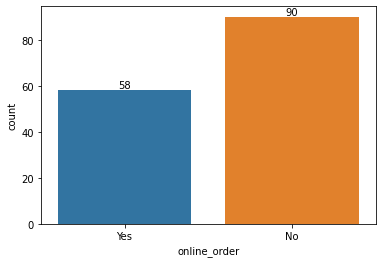

In [170]:

ax= sns.countplot(x = "online_order", data = df)
ax.bar_label(ax.containers[0])
plt.show()

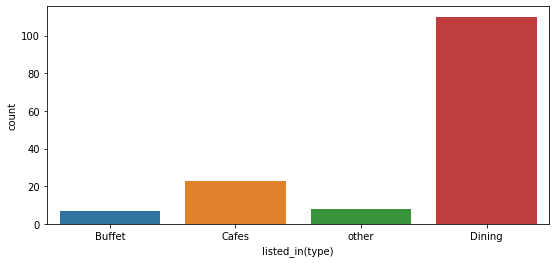

In [41]:
plt.figure(figsize=(9,4))
sns.countplot(x ="listed_in(type)",data = df)
plt.show()

## Conclusion = "Majority of Customer falls into Dinning Category"

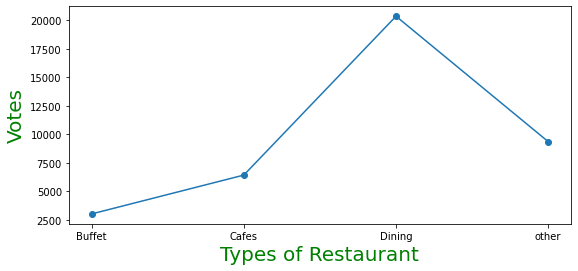

In [77]:
plt.figure(figsize=(9,4))
gb = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": gb})
plt.plot(result, marker = "o")
plt.xlabel("Types of Restaurant",size = 20, color = "green")
plt.ylabel("Votes",size = 20,color = "green")
plt.show()

## conclusion: Dining restaurant got heighest votes

<Figure size 360x360 with 0 Axes>

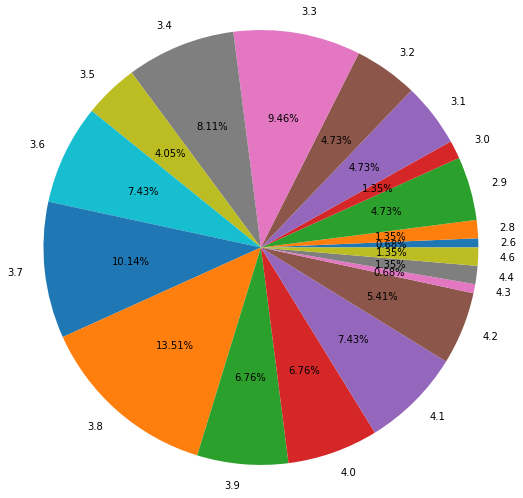

In [112]:
plt.figure(figsize = (5,5))
gb = df.groupby("rate").agg({"rate":"count"})
plt.figure(figsize=(9,4))
plt.pie(gb["rate"], labels = gb.index, autopct = "%1.2f%%", radius =2.5 )
plt.show()

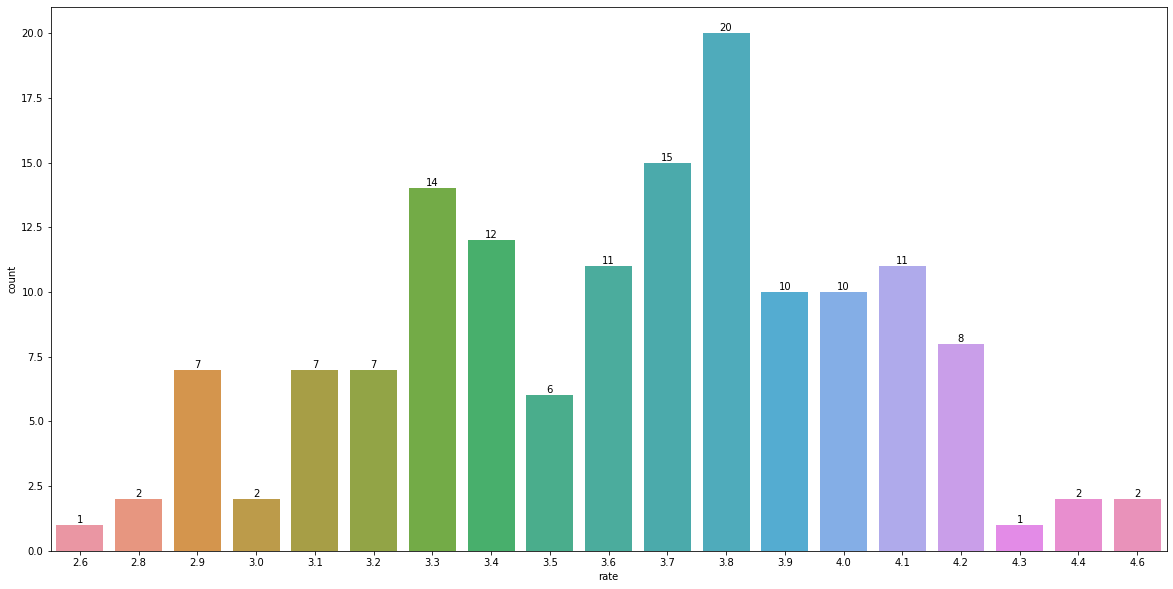

In [101]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = "rate", data  = df)
ax.bar_label(ax.containers[0])
plt.show()


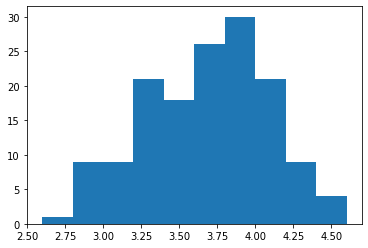

In [116]:
plt.hist(df["rate"], bins = 10)
plt.show()

## Conclusion : The majority restaurant received rating in between 3.5 to 4

In [117]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


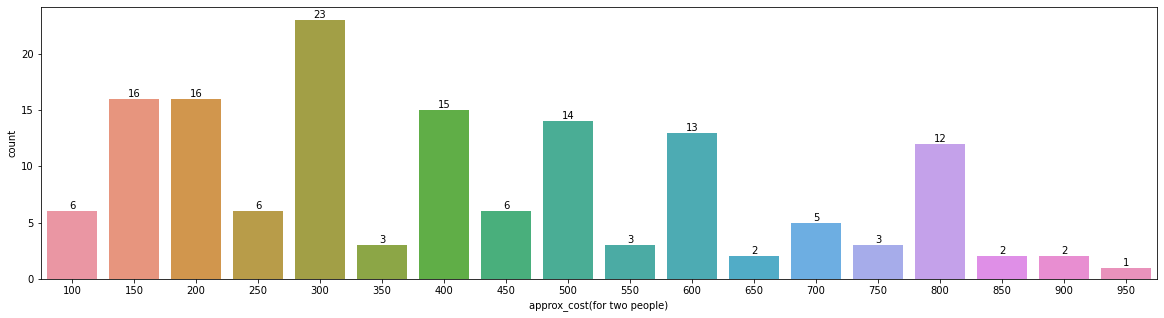

In [118]:
plt.figure(figsize=(20,5))
ax =sns.countplot(x = "approx_cost(for two people)", data = df)
ax.bar_label(ax.containers[0])
plt.show()

## conclusion : Average Order Amount is 300

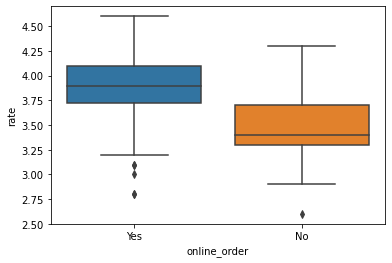

In [141]:
sns.boxplot(x = "online_order", y = "rate", data = df)
plt.show()



## conclusion: Online mode received max rating

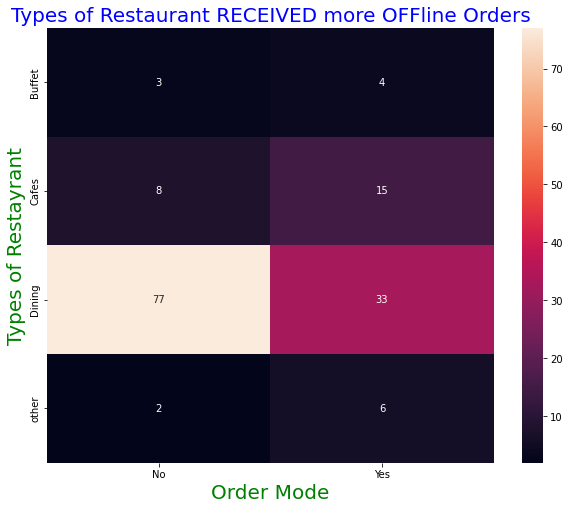

In [168]:
plt.figure(figsize=(10,8))
pivot_table = df.pivot_table(index = "listed_in(type)", columns = "online_order" , aggfunc ='size', fill_value = 0)
sns.heatmap(pivot_table, annot = True,  fmt = 'd')
plt.xlabel("Order Mode", size = 20 , color = "green")
plt.ylabel("Types of Restayrant", size = 20, color = "green")
plt.title("Types of Restaurant RECEIVED more OFFline Orders", color = "blue", size= 20)
plt.show()

## conclusion: Dining Restaurant primarily accept Offline orders wghereas cafes primarily accept online orders